In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dict = {}

TORQUE  = 60
cuts = ['RoughCut', 'SmoothCut', 'SinglePiece_Hanging']
volts = [1, 5, 10]

for cut in cuts:
    for volt in volts:
        # def file name
        if cut == 'RoughCut':
            filename = f'../dataset/SmallMonolithWN/{cut}/{TORQUE} lbin Cut_txt/CutHanging_{TORQUE}lbin_ampVolts{volt}_x.txt'
        elif cut == 'SmoothCut':
            filename = f'../dataset/SmallMonolithWN/{cut}/{TORQUE} lbin txt/Hanging_CutSmooth_{TORQUE}lbin_ampVolts{volt}_x.txt'
        elif cut == 'SinglePiece_Hanging':
            filename = f'../dataset/SmallMonolithWN/{cut}/{TORQUE} lbin txt/Hanging_{TORQUE}lbin_ampVolts{volt}_x.txt'
        # load file
        with open(filename, 'rb') as f:
            info = f.read(128).decode('ascii').split('\n')
            data = np.frombuffer(f.read(), np.float16)
        data = data[448:].reshape(eval(info[4])) # cut off the first 448 values (?) 
        data_dict[f'{cut}_{volt}'] = data[0, :] # select 0th position

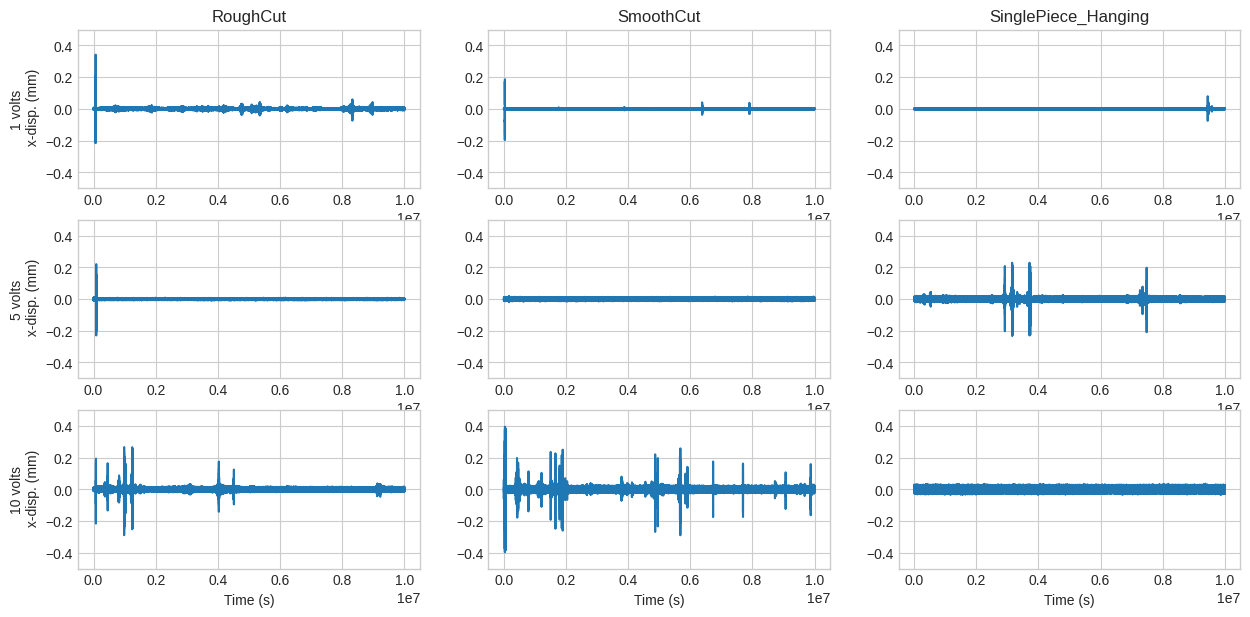

In [20]:
# grid of plots
fig, ax = plt.subplots(len(volts), len(cuts), figsize=(15, 7))
for i, cut in enumerate(cuts):
    for j, volt in enumerate(volts):
        ax[j, i].plot(data_dict[f'{cut}_{volt}'])
        # set title
        if j == 0:
            ax[j, i].set_title(f'{cut}')
        # set x-label
        if j == len(volts)-1:
            ax[j, i].set_xlabel('Time (s)')
        # set y-label
        if i == 0:
            ax[j, i].set_ylabel(f'{volt} volts\n x-disp. (mm)')
        # set y-limits
        ax[j, i].set_ylim([-0.5, 0.5])
